In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [261]:
def rmse(y,pred):
    return np.sqrt(np.mean(np.square(y-pred)))

In [262]:
def getModelScore(x,y,degree):
    poly = PolynomialFeatures(degree = degree)
    xPoly = poly.fit_transform(np.array(x).reshape(-1,1))
    # xtrain, xtest,ytrain, ytest = tts(xPoly, gold)
    model = LinearRegression()
    model.fit(xPoly, y)
    prediction = model.predict(xPoly)
    return rmse(prediction, y)

In [263]:
data = pd.read_csv("../week4/gold2.csv")

In [264]:
data = data.rename({'Unnamed: 0':'years', '0':'gold'}, axis =1)

In [265]:
years = data['years']
gold = data['gold']

In [266]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

In [267]:
errors =[]
for degree in range(1,20):
    errors.append(getModelScore(years, gold, degree))

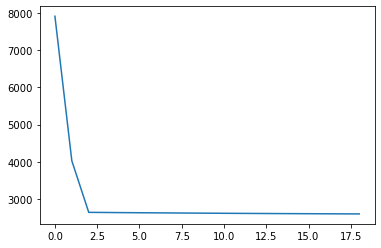

In [268]:
plt.plot(errors)

### Degree 2 onwards has the lowest RMSE score

In [269]:
degree = 3
poly = PolynomialFeatures(degree = degree)
xPoly = poly.fit_transform(np.array(years).reshape(-1,1))
# xtrain, xtest,ytrain, ytest = tts(xPoly, gold)
model = LinearRegression()
model.fit(xPoly, gold)
prediction = model.predict(xPoly)

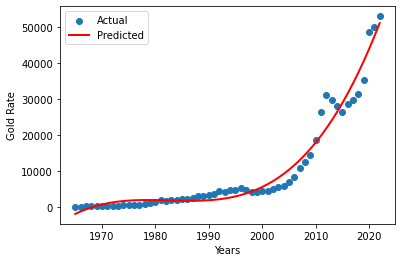

In [270]:
plt.scatter(years, gold, label = "Actual", marker = 'o')
plt.plot(years, prediction, color = 'red', label = "Predicted", lw = '2')
plt.xlabel("Years")
plt.ylabel("Gold Rate")
plt.legend()